In [20]:
import pandas as pd
import numpy as np

In [33]:
df=pd.read_csv('Downloads/international-airline-passengers.csv',usecols=[1])

In [35]:
vlues=df.values.astype(int)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train=vlues[:100]

In [39]:
x_test=vlues[100:]

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
sc=MinMaxScaler()

In [42]:
x_train=sc.fit_transform(x_train)

In [43]:
x_test=sc.transform(x_test)

In [48]:
def create_dataset(data,k):
    datax,datay=[],[]
    for i in range(len(data)-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        datax.append(x)
        datay.append(y)
    return np.array(datax),np.array(datay)

In [55]:
test_x,test_y=create_dataset(x_test,12)
train_x,train_y=create_dataset(x_train,12)

In [57]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
train_x=np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
test_x=np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

In [52]:
model=Sequential()

In [58]:
model.add(SimpleRNN(4,input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train_x,train_y,epochs=50,batch_size=1)

Epoch 1/50
88/88 [==============================] - 27s 18ms/step - loss: 0.0494
Epoch 2/50
88/88 [==============================] - 2s 17ms/step - loss: 0.0292
Epoch 3/50
88/88 [==============================] - 1s 16ms/step - loss: 0.0243
Epoch 4/50
88/88 [==============================] - 2s 18ms/step - loss: 0.0223: 0s - loss: 0.022
Epoch 5/50
88/88 [==============================] - 2s 17ms/step - loss: 0.0201
Epoch 6/50
88/88 [==============================] - 2s 25ms/step - loss: 0.0189
Epoch 7/50
88/88 [==============================] - 2s 21ms/step - loss: 0.0175
Epoch 8/50
88/88 [==============================] - 2s 20ms/step - loss: 0.0166
Epoch 9/50
88/88 [==============================] - 2s 18ms/step - loss: 0.0154
Epoch 10/50
88/88 [==============================] - 2s 18ms/step - loss: 0.0153: 0s - 
Epoch 11/50
88/88 [==============================] - 2s 19ms/step - loss: 0.0147
Epoch 12/50
88/88 [==============================] - 2s 19ms/step - loss: 0.0137
Epoch 13/50

In [60]:
test_pred=model.predict(test_x)

In [63]:
test_pred=sc.inverse_transform(test_pred).ravel()

In [65]:
train_pred=model.predict(train_x)
train_pred=sc.inverse_transform(train_pred).ravel()

In [66]:
test_true=sc.inverse_transform([test_y]).ravel()
train_true=sc.inverse_transform([train_y]).ravel()

In [67]:
import matplotlib.pyplot as plt

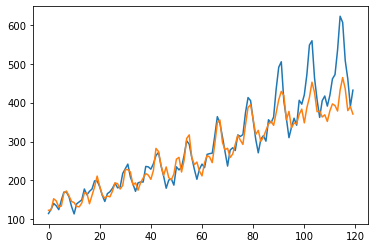

In [72]:
plt.plot(true)
plt.plot(pred)

In [71]:
pred=np.concatenate((train_pred,test_pred))
true=np.concatenate((train_true,test_true))